In [1]:
import numpy as np
import pandas as pd


%matplotlib inline

/home/kke1/.local/lib/python2.7/site-packages/pandas/core/nanops.py:39: UserWarning: The installed version of bottleneck 0.7.0 is not supported in pandas and will be not be used
The minimum supported version is 1.0.0

  ver=ver, min_ver=_MIN_BOTTLENECK_VERSION), UserWarning)


('Class 0:', 282686)
('Class 1:', 24825)
('Proportion:', 11.0, ': 1')


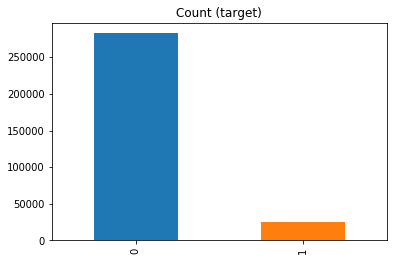

In [2]:
df_train = pd.read_csv('m_train_small.csv')
target_count = df_train.TARGET.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)');

In [3]:
df_train.head(5)

,EXT_SOURCE_2,EXT_SOURCE_1,EXT_SOURCE_3,DAYS_BIRTH,PAYMENT Ratio,AMT_CREDIT,AVG INSTALMENT LENGTH,bureau_DAYS_ENDDATE_FACT_max,bureau_AMT_CREDIT_SUM_max,PAYOFF DAY DIFFERENCES,...,FLAG_DOCUMENT_13,client_bureau_balance_STATUS_0_count_min,"NAME_TYPE_SUITE_Spouse, partner",ORGANIZATION_TYPE_Transport: type 3,Living Enviroment,bureau_CREDIT_TYPE_Microloan_count,ORGANIZATION_TYPE_Industry: type 9,bureau_CNT_CREDIT_PROLONG_mean,TARGET,SK_ID_CURR
0,0.262949,0.083037,0.139376,9461,1.000000,406597.5,24.0,-36.0,450000.0,20.421053,...,0,2.0,0.0,0,5,0.0,0,0.0,1,100002
1,0.622246,0.311267,0.510853,16765,1.000000,1293502.5,10.0,-540.0,810000.0,7.160000,...,0,NaN,0.0,0,4,0.0,0,0.0,0,100003
2,0.555912,0.502130,0.729567,19046,1.000000,135000.0,4.0,-382.0,94537.8,7.666667,...,0,NaN,0.0,0,2,0.0,0,0.0,0,100004
3,0.650442,0.502130,0.510853,19005,1.000000,312682.5,6.0,NaN,NaN,19.375000,...,0,NaN,0.0,0,2,NaN,0,NaN,0,100006
4,0.322738,0.502130,0.510853,19932,0.954545,513000.0,15.0,-783.0,146250.0,3.636364,...,0,NaN,0.0,0,2,0.0,0,0.0,0,100007


<h1> Resampling

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).
Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.
Let's implement a basic example, which uses the DataFrame.sample method to get random samples each class:

In [4]:
# Class count
count_class_0, count_class_1 = df_train.TARGET.value_counts()

# Divide by class
df_class_0 = df_train[df_train['TARGET'] == 0]
df_class_1 = df_train[df_train['TARGET'] == 1]

**Random under-sampling**

Random under-sampling:
1    24825
0    24825
Name: TARGET, dtype: int64


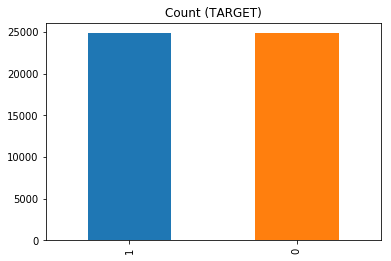

In [5]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.TARGET.value_counts())

df_test_under.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

**Random over-sampling**

Random over-sampling:
1    282686
0    282686
Name: TARGET, dtype: int64


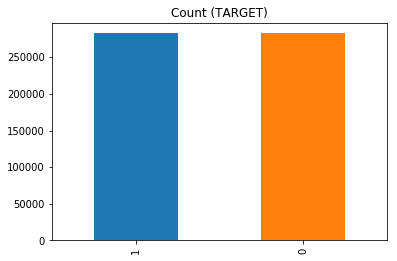

In [6]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.TARGET.value_counts())

df_test_over.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

In [50]:
df_test_over.to_csv("oversample.csv")

**Python imbalanced-learn module **

A number of more sophisticated resapling techniques have been proposed in the scientific literature.
For example, we can cluster the records of the majority class, and do the under-sampling by removing records from each cluster, thus seeking to preserve information. In over-sampling, instead of creating exact copies of the minority class records, we can introduce small variations into those copies, creating more diverse synthetic samples.
Let's apply some of these resampling techniques, using the Python library imbalanced-learn. It is compatible with scikit-learn and is part of scikit-learn-contrib projects.

In [7]:
! pip install imblearn --user

In [8]:
import imblearn

For ease of visualization, let's create a small unbalanced sample dataset using the make_classification method:

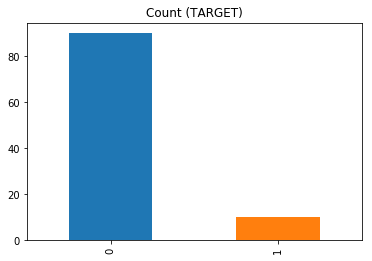

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['TARGET'] = y
df.TARGET.value_counts().plot(kind='bar', title='Count (TARGET)');

We will also create a 2-dimensional plot function, plot_2d_space, to see the data distribution:

In [10]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Because the dataset has many dimensions (features) and our graphs will be 2D, we will reduce the size of the dataset using Principal Component Analysis (PCA):

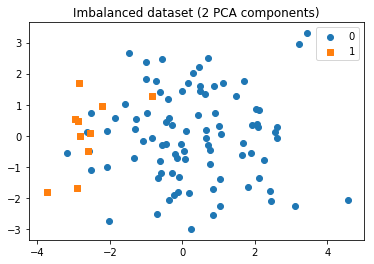

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

**Random under-sampling and over-sampling with imbalanced-learn **

('Removed indexes:', array([80, 95, 90, 35,  5, 84, 72, 17, 94, 51,  4,  8,  9, 14, 16, 40, 67,
       70, 71, 74]))


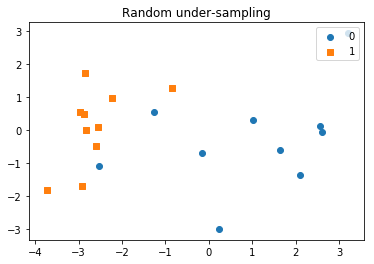

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(return_indices=True)
X_rus, y_rus, id_rus = rus.fit_sample(X, y)

print('Removed indexes:', id_rus)

plot_2d_space(X_rus, y_rus, 'Random under-sampling')

(80, 'new random picked points')


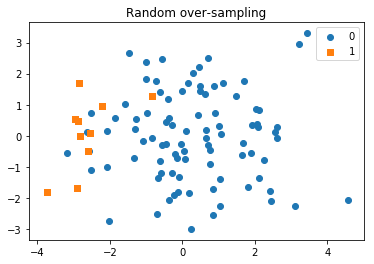

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'new random picked points')

plot_2d_space(X_ros, y_ros, 'Random over-sampling')

**Under-sampling: Tomek links **¶

Tomek links are pairs of very close instances, but of opposite classes. Removing the instances of the majority class of each pair increases the space between the two classes, facilitating the classification process.
In the code below, we'll use ratio='majority' to resample the majority class.

('Removed indexes:', array([ 0,  1,  2,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
       70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       87, 88, 90, 91, 92, 93, 94, 95, 97, 98, 99]))


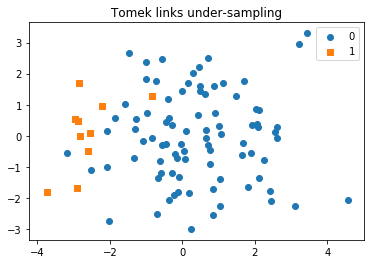

In [14]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(return_indices=True, ratio='majority')
X_tl, y_tl, id_tl = tl.fit_sample(X, y)

print('Removed indexes:', id_tl)

plot_2d_space(X_tl, y_tl, 'Tomek links under-sampling')

**Under-sampling: Cluster Centroids** 

This technique performs under-sampling by generating centroids based on clustering methods. The data will be previously grouped by similarity, in order to preserve information.
In this example we will pass the {0: 10} dict for the parameter ratio, to preserve 10 elements from the majority class (0), and all minority class (1) .

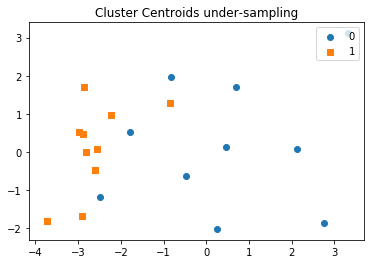

In [15]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(ratio={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

**Over-sampling: SMOTE **

SMOTE (Synthetic Minority Oversampling TEchnique) consists of synthesizing elements for the minority class, based on those that already exist. It works randomly picingk a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.
We'll use ratio='minority' to resample the minority class.

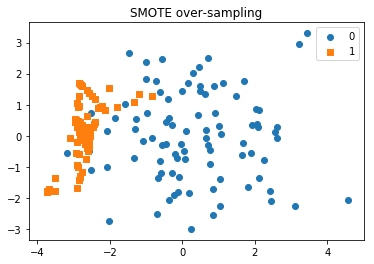

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

**Over-sampling followed by under-sampling **

Now, we will do a combination of over-sampling and under-sampling, using the SMOTE and Tomek links techniques:

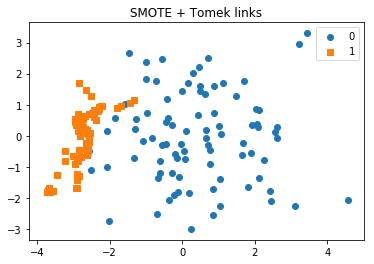

In [17]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(ratio='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

<h1>Deploying Machine Learning Model over Resampled Dataset 

In [28]:
# Deploying Logistic Regression
#Splitting the dataset
#Keep the following 6 features (variables) which are important
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split


In [46]:
#Split in 75% train and 25% test set
df_test_over2=df_test_over.fillna(-1)
train_df, test_df = train_test_split(df_test_over2, test_size = 0.25, random_state= 1984)

#Define 'y' labels
y_train = train_df['TARGET']
y_test = test_df['TARGET']

#Define 'x' sets
X_train = train_df.drop(['TARGET'], axis = 1)
X_test = test_df.drop(['TARGET'], axis = 1)

In [34]:
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.61


In [36]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.60      0.64      0.62     70834
          1       0.61      0.58      0.59     70509

avg / total       0.61      0.61      0.61    141343

0.6064750288305752


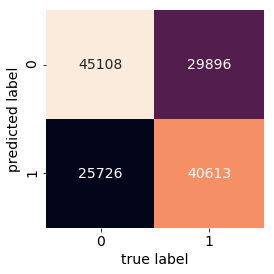

In [37]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');

<h1> Random Forest Classifier 

In [38]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

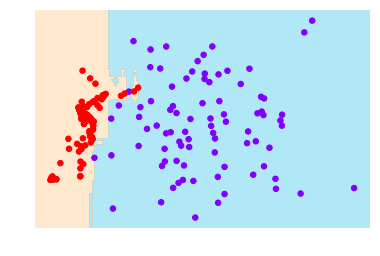

In [39]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, X_smt, y_smt);

In [47]:
from sklearn.cross_validation import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X_smt, y_smt,
#                                                 random_state=0)
model = RandomForestClassifier(n_estimators=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [48]:
from sklearn import metrics
print(metrics.classification_report(y_pred, y_test))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     70576
          1       1.00      1.00      1.00     70767

avg / total       1.00      1.00      1.00    141343



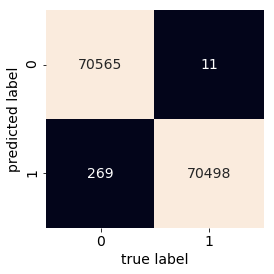

In [49]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label');